# Problem 3 - 5x5 Gridworld

## Basic principle

Value Iteration calculates the maximum expected cumulative reward for each state, based on the Bellman Optimality Equation:

$V^*(s) = \max_a \sum_{s'} P(s'|s,a) [ R(s,a,s') + \gamma V^*(s') ]$

Define environment:
- State $s$ corresponds to each cell coordinate (row, col) in the gridworld.
- Actions $a$: right, left, down, and up.
- Transitions are deterministic, meaning $P(s'|s,a)$ is either 1 or 0.
- Reward $R(s,a,s')$  is the reward obtained when moving to the new state $s'$, defined as +10 for the goal state, -5 for gray cells, and -1 for all other cells.
- $gamma$ is the discount factor.


## Computation process explanation

1. **Initialization**  
   Initialize $V(s)$ for all non-terminal states.

2. **Iterative Update**  
   For each state $s$, evaluate all possible actions $a$, and compute:

   $Q(s,a) = R(s,a,s') + \gamma V(s')$
   
   where $s'$ is the state reached after taking action $a$.

3. **Maximization**  
   Update the value function:

   $V(s) = \max_a Q(s,a)$
   
   while recording the optimal action.

4. **Repeat**  
   Repeat steps 2-3 until $V$ converges or the maximum number of iterations is reached.

## Set the lec3_DP Python module path
Based on the code in the lec3_DP folder, implement the 5x5 Gridworld MDP and Value Iteration.

In [59]:
import sys
import os

# Find lec3_DP path
sys.path.append(os.path.join(os.getcwd(), 'playground', 'lec3_DP'))
print("Path setup complete. Ready for imports.")

Path setup complete. Ready for imports.


## Importing GridWorld and Agent classes

In [60]:
import numpy as np
import time
from gridworld import GridWorld
from value_iteration_agent import Agent

## Initialize a 5x5 Gridworld environment and set the reward
- End State: (4,4) Reward +10
- Gray State: \{(2,2), (3,0), (0,4)\} Penalty -5
- Other States: Penalty -1

In [61]:
# Initialize a 5x5 Gridworld environment
env = GridWorld(5)

# Adjust reward: +10 for the end point, -5 for the gray grid, -1 for the rest
env.reward = np.ones((env.env_size, env.env_size)) * -1
grey_states = [(2, 2), (3, 0), (0, 4)]
for gs in grey_states:
    env.reward[gs] = -5
env.reward[env.terminal_state] = 10

print("Adjusted reward matrix:\n", env.reward)

Adjusted reward matrix:
 [[-1. -1. -1. -1. -5.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -5. -1. -1.]
 [-5. -1. -1. -1. -1.]
 [-1. -1. -1. -1. 10.]]


## Create an Agent and initialize parameters gamma and theta
- Discount factor - $gamma=0.9$
- Convergence threshold - $theta=0.01$

In [62]:
agent = Agent(env, theta_threshold=0.01, gamma=0.9)
print("Agent initialized. Environment size: ", env.env_size)
print("Initial Value Function:\n", agent.get_value_function())

Agent initialized. Environment size:  5
Initial Value Function:
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## Standard Batch Value Iteration
Each round uses the old $V$ to calculate the new $V$ and save it to a new array. After the round is completed, the whole thing is copied back to $V$.

In [63]:
# Execute standard batch value iteration until convergence or the maximum number of iterations is reached
MAX_ITER = 1000

start = time.time()

for itr in range(MAX_ITER):
    new_V = np.copy(agent.get_value_function())
    for i in range(env.env_size):
        for j in range(env.env_size):
            if not env.is_terminal_state(i, j):
                new_V[i, j], _, _ = agent.calculate_max_value(i, j)
    if agent.is_done(new_V):
        print(f"Batch Value Iteration converged after {itr+1} iterations")
        break
    agent.update_value_function(new_V)

end = time.time()
print(f"\nBatch Update Time: {end - start:.4f} seconds")

Batch Value Iteration converged after 9 iterations

Batch Update Time: 0.0012 seconds


## Display the best strategies for the optimal state-value function $V∗$ and the optimal policy $π∗$

In [64]:
agent.update_greedy_policy()
print("Batch optimal Value Function:")
print(np.round(agent.get_value_function(), 2))
print("\nBatch optimal Policy:")
agent.print_policy()

Batch optimal Value Function:
[[-0.43  0.63  1.81  3.12  4.58]
 [ 0.63  1.81  3.12  4.58  6.2 ]
 [ 1.81  3.12  4.58  6.2   8.  ]
 [ 3.12  4.58  6.2   8.   10.  ]
 [ 4.58  6.2   8.   10.    0.  ]]

Batch optimal Policy:
['Right|Down', 'Right|Down', 'Right|Down', 'Down', 'Down']
['Right|Down', 'Right|Down', 'Right', 'Right|Down', 'Down']
['Right', 'Down', 'Right|Down', 'Right|Down', 'Down']
['Right|Down', 'Right|Down', 'Right|Down', 'Right|Down', 'Down']
['Right', 'Right', 'Right', 'Right', 'X']


## In-place value iteration
The same $V$ array is updated immediately, and the next state calculation uses the latest updated value. Faster convergence is expected.

In [65]:
# Reset agent
agent = Agent(env, theta_threshold=0.01, gamma=0.9)

start = time.time()

# Execute in-place value iteration
for itr in range(MAX_ITER):
    delta = 0
    for i in range(env.env_size):
        for j in range(env.env_size):
            if not env.is_terminal_state(i, j):
                v = agent.V[i, j]
                new_v, _, _ = agent.calculate_max_value(i, j)
                agent.V[i, j] = new_v
                delta = max(delta, abs(v - new_v))
    if delta <= agent.theta_threshold:
        print(f"In-place Value Iteration converged after {itr+1} iterations")
        break

end = time.time()
print(f"\nIn-place Update Time: {end - start:.4f} seconds")

In-place Value Iteration converged after 9 iterations

In-place Update Time: 0.0016 seconds


## Display the best strategies for the optimal state-value function $V∗$ and the optimal policy $π∗$

In [67]:
# Output in-place results
agent.update_greedy_policy()
print("In-Place Optimal Value Function:")
print(np.round(agent.get_value_function(), 2))
print("\nIn-place optimal Policy")
agent.print_policy()

In-Place Optimal Value Function:
[[-0.43  0.63  1.81  3.12  4.58]
 [ 0.63  1.81  3.12  4.58  6.2 ]
 [ 1.81  3.12  4.58  6.2   8.  ]
 [ 3.12  4.58  6.2   8.   10.  ]
 [ 4.58  6.2   8.   10.    0.  ]]

In-place optimal Policy
['Right|Down', 'Right|Down', 'Right|Down', 'Down', 'Down']
['Right|Down', 'Right|Down', 'Right', 'Right|Down', 'Down']
['Right', 'Down', 'Right|Down', 'Right|Down', 'Down']
['Right|Down', 'Right|Down', 'Right|Down', 'Right|Down', 'Down']
['Right', 'Right', 'Right', 'Right', 'X']


## Optimal Strategy $π ∗$ Arrow Plot

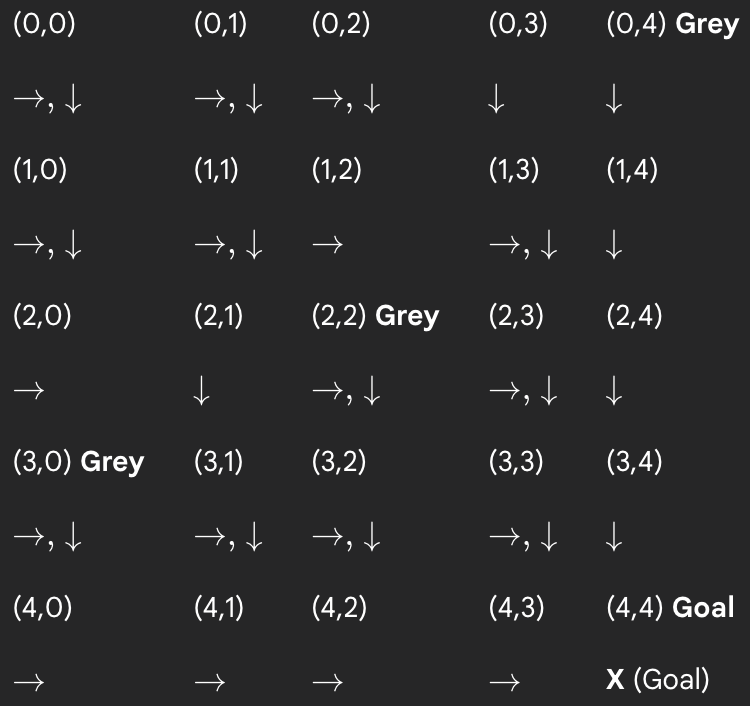

Notes:
- **→** indicates the action is Right.
- **↓** indicates the action is Down.
- **→,↓** indicates both Right and Down are optimal actions.
- **X (Goal)** indicates the Terminal State.
- **Grey** marks states with a penalty of $R=−5$.

## Summary

- A complete reward setting and state transition strategy are implemented.
- Both Batch and In-place value iteration methods converge to the **same optimal value function and strategy** in this environment.
- Both methods converged in **9 iterations**. While the In-place method is theoretically expected to converge faster and may require fewer iterations, in this specific execution, the **Batch method was slightly faster** (0.0012 seconds vs. 0.0016 seconds). The In-place update is generally preferred for its potential computational efficiency.